In [82]:
# Kutibxonalardi tortib olamiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [83]:
# dataset ornatib olamiz
df = pd.read_csv("adultincomedatase.csv")

In [84]:
# data bilan tanishib chiqamiz
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [85]:
# data bilan tanishib chiqamiz
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [86]:
# data bilan tanishib chiqamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [87]:
# data bilan tanishib chiqamiz
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [88]:
# data bilan tanishib chiqamiz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [89]:
# Null qiymatlarni tekshib olamiz

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [90]:
df.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K


In [91]:
# Check cardinality of categorical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    print(f"Cardinality of '{col}': {df[col].nunique()}")

Cardinality of 'workclass': 9
Cardinality of 'education': 16
Cardinality of 'marital-status': 7
Cardinality of 'occupation': 15
Cardinality of 'relationship': 6
Cardinality of 'race': 5
Cardinality of 'gender': 2
Cardinality of 'native-country': 42
Cardinality of 'income': 2


In [92]:
# cardinality ni koramiz
cardinality=df[categorical_cols].nunique()

In [93]:
#tekshiramiz
cardinality

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
income             2
dtype: int64

In [94]:
# cardinalitylarni ikkiga ajratib oldim 
threshold = 5

low_cardinality_cols = []
high_cardinality_cols = []


for col in categorical_cols:
    unique_values = df[col].nunique()  # Count unique values
    if unique_values > threshold:  # High cardinality check
        high_cardinality_cols.append(col)
    else:
        low_cardinality_cols.append(col)

print("High Cardinality Columns:", high_cardinality_cols)
print("Low Cardinality Columns:", low_cardinality_cols)


High Cardinality Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country']
Low Cardinality Columns: ['race', 'gender', 'income']


In [95]:
#  cardinality columns korish
high_cardinality_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country']

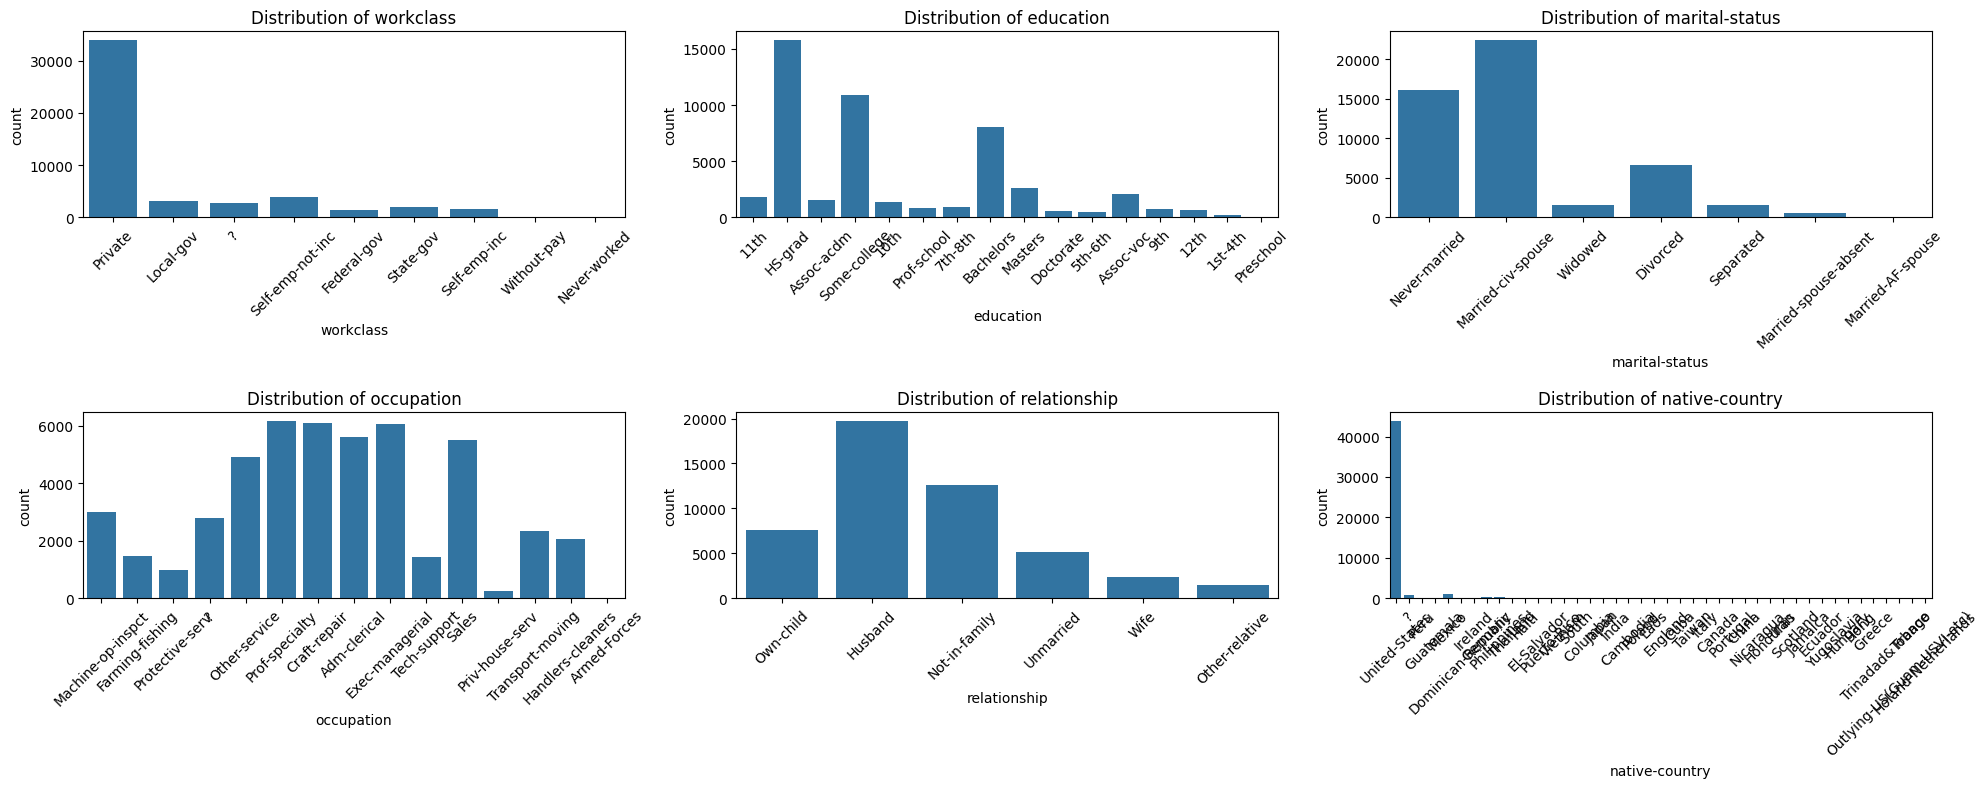

In [96]:
# ploting
plt.figure(figsize=(20, 10))


for i, col in enumerate(high_cardinality_cols, 1):
    plt.subplot(len(high_cardinality_cols) // 3 + 1, 3, i)  
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


In [97]:
low_cardinality_cols

['race', 'gender', 'income']

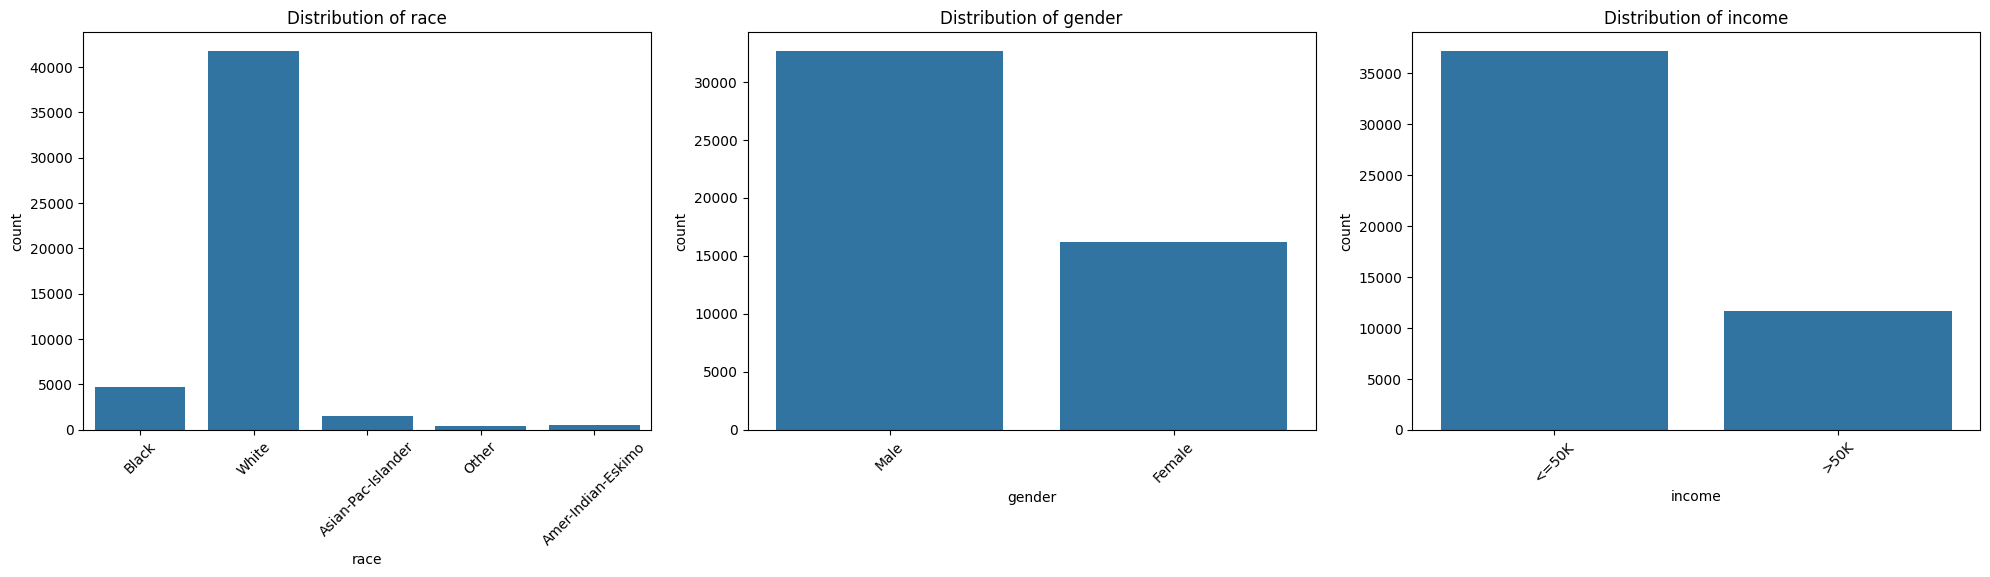

In [98]:

plt.figure(figsize=(20, 10))


for i, col in enumerate(low_cardinality_cols, 1):
    plt.subplot(len(low_cardinality_cols) // 3 + 1, 3, i) 
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45) 


plt.tight_layout()
plt.show()

In [99]:
high_cardinality_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'native-country']

In [100]:
# high cardinarity bolganligi uchun  LabelEncoder dan foydalandim

label_encoder = LabelEncoder()


columns_to_encode = ["workclass", "education", "marital-status", "occupation", "relationship", "native-country"]

# har bir ustunni labellash
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  int64 
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  int64 
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  int64 
 6   occupation       48842 non-null  int64 
 7   relationship     48842 non-null  int64 
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  int64 
 14  income           48842 non-null  object
dtypes: int64(12), object(3)
memory usage: 5.6+ MB


In [102]:
# categorical qiymatlarni numerical qiymatga otkazib olamiz

categorical_col=df.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [103]:
#Numericalga otganmi yoqmi tekshiramiz

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
 14  income           48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [104]:
#x va y ni aniqlash
x=df.drop('income',axis=1)

In [105]:
# Income columngacha bolganni teskhiramiz

x.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39


In [106]:
y=df['income']

In [107]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [29]:
# Splitting ga ajratib olamiz
from sklearn.model_selection import train_test_split

In [30]:
# Step 1: Split into 70% training and 30% temp
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# Step 2: Split the temp set into 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
len(x_train)

34189

In [32]:
len(x_val)

7326

In [40]:
#Scaler qilb olamiz

scaler=StandardScaler()

In [44]:
x_train_scaled=scaler.fit_transform(x_train)

# Modelni improve qilish uchun datani tayyorlaymiz va scaler qilb olamiz

x_test_scaled=scaler.fit_transform(x_test)
x_val_scaled=scaler.transform(x_val)

In [45]:
len(x_train_scaled)

34189

In [46]:
len(x_train)

34189

In [47]:
#Model aniqlab olamiz
dt_model = DecisionTreeClassifier(random_state=42)

In [49]:
dt_model.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
y_pred_scaled=dt_model.predict(x_test_scaled)

In [51]:
accuracy=accuracy_score(y_test,y_pred_scaled)

In [52]:
accuracy

0.8108366316364133

In [ ]:
# 0.8108366316364133

In [54]:
# Cross Validation
from sklearn.model_selection import cross_val_score


cv_scores=cross_val_score(dt_model,x_train_scaled,y_train,cv=5)

In [55]:
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.81281076 0.81339573 0.80813103 0.80827727 0.80298376]


In [57]:
print("Mean cross-validation scores:", cv_scores.mean())

Mean cross-validation scores: 0.8091197128916294


In [ ]:
Mean cross-validation scores:  0.8091197128916294


In [67]:
# Hyperparameter tuning for dEcision tree

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto', 'sqrt', 'log2']
    }


In [69]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)


In [70]:
# Fit the model with the best parameters
grid_search.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Use

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [72]:
best_params=grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [73]:
best_model=grid_search.best_estimator_

In [74]:
best_model

DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)

In [75]:
y_pred=best_model.predict(x_test_scaled)

In [76]:
accuracy=accuracy_score(y_test, y_pred)

In [77]:
accuracy

0.8506892316091169

In [ ]:
# 0.8506892316091169 after hyper
# 0.8108366316364133 before hyper
# Mean cross-validation scores:  0.8091197128916294

In [112]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Baseline score topish (Classification)
X = df.copy()
y = X.pop("income")


baseline = DecisionTreeClassifier(criterion="gini", random_state=42)


baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="accuracy"
)
baseline_score_mean = baseline_score.mean()

print(f"Baseline Accuracy Score: {baseline_score_mean:.4f}")


Baseline Accuracy Score: 0.8155


In [136]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48842 non-null  int64
 1   workclass        48842 non-null  int64
 2   fnlwgt           48842 non-null  int64
 3   education        48842 non-null  int64
 4   educational-num  48842 non-null  int64
 5   marital-status   48842 non-null  int64
 6   occupation       48842 non-null  int64
 7   relationship     48842 non-null  int64
 8   race             48842 non-null  int64
 9   gender           48842 non-null  int64
 10  capital-gain     48842 non-null  int64
 11  capital-loss     48842 non-null  int64
 12  hours-per-week   48842 non-null  int64
 13  native-country   48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [ ]:
#
X['CapitalGain_to_Hours'] = X['capital-gain'] / df['hours-per-week']

print(X[['capital-gain', 'hours-per-week', 'CapitalGain_to_Hours']].head())



   capital-gain  hours-per-week  CapitalGain_to_Hours
0             0              40                   0.0
1             0              50                   0.0
2             0              40                   0.0
3          7688              40                 192.2
4             0              30                   0.0


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   48842 non-null  int64  
 1   workclass             48842 non-null  int64  
 2   fnlwgt                48842 non-null  int64  
 3   education             48842 non-null  int64  
 4   educational-num       48842 non-null  int64  
 5   marital-status        48842 non-null  int64  
 6   occupation            48842 non-null  int64  
 7   relationship          48842 non-null  int64  
 8   race                  48842 non-null  int64  
 9   gender                48842 non-null  int64  
 10  capital-gain          48842 non-null  int64  
 11  capital-loss          48842 non-null  int64  
 12  hours-per-week        48842 non-null  int64  
 13  native-country        48842 non-null  int64  
 14  CapitalGain_to_Hours  48842 non-null  float64
dtypes: float64(1), int6

In [121]:
X=X.astype(int)

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   48842 non-null  int64
 1   workclass             48842 non-null  int64
 2   fnlwgt                48842 non-null  int64
 3   education             48842 non-null  int64
 4   educational-num       48842 non-null  int64
 5   marital-status        48842 non-null  int64
 6   occupation            48842 non-null  int64
 7   relationship          48842 non-null  int64
 8   race                  48842 non-null  int64
 9   gender                48842 non-null  int64
 10  capital-gain          48842 non-null  int64
 11  capital-loss          48842 non-null  int64
 12  hours-per-week        48842 non-null  int64
 13  native-country        48842 non-null  int64
 14  CapitalGain_to_Hours  48842 non-null  int64
dtypes: int64(15)
memory usage: 5.6 MB


In [129]:

# Create new ratio columns
X['Age_to_Hours'] = X['age'] / X['hours-per-week']
X['CapitalLoss_to_Hours'] = X['capital-loss'] / X['hours-per-week']
X['Hours_to_Age'] = X['hours-per-week'] / X['age']

# Display the newly created ratios
print(X[['age', 'capital-loss', 'hours-per-week', 'Age_to_Hours', 'CapitalLoss_to_Hours', 'Hours_to_Age']].head())


   age  capital-loss  hours-per-week  Age_to_Hours  CapitalLoss_to_Hours  \
0   25             0              40         0.625                   0.0   
1   38             0              50         0.760                   0.0   
2   28             0              40         0.700                   0.0   
3   44             0              40         1.100                   0.0   
4   18             0              30         0.600                   0.0   

   Hours_to_Age  
0      1.600000  
1      1.315789  
2      1.428571  
3      0.909091  
4      1.666667  


In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   48842 non-null  int64  
 1   workclass             48842 non-null  int64  
 2   fnlwgt                48842 non-null  int64  
 3   education             48842 non-null  int64  
 4   educational-num       48842 non-null  int64  
 5   marital-status        48842 non-null  int64  
 6   occupation            48842 non-null  int64  
 7   relationship          48842 non-null  int64  
 8   race                  48842 non-null  int64  
 9   gender                48842 non-null  int64  
 10  capital-gain          48842 non-null  int64  
 11  capital-loss          48842 non-null  int64  
 12  hours-per-week        48842 non-null  int64  
 13  native-country        48842 non-null  int64  
 14  CapitalGain_to_Hours  48842 non-null  int64  
 15  Age_to_Hours       

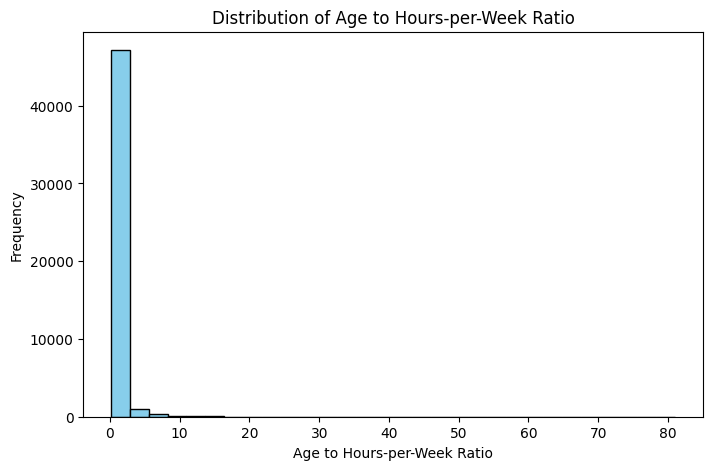

In [131]:
import matplotlib.pyplot as plt

# Histogram of Age to Hours ratio
plt.figure(figsize=(8, 5))
plt.hist(df['Age_to_Hours'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age to Hours-per-Week Ratio')
plt.xlabel('Age to Hours-per-Week Ratio')
plt.ylabel('Frequency')
plt.show()


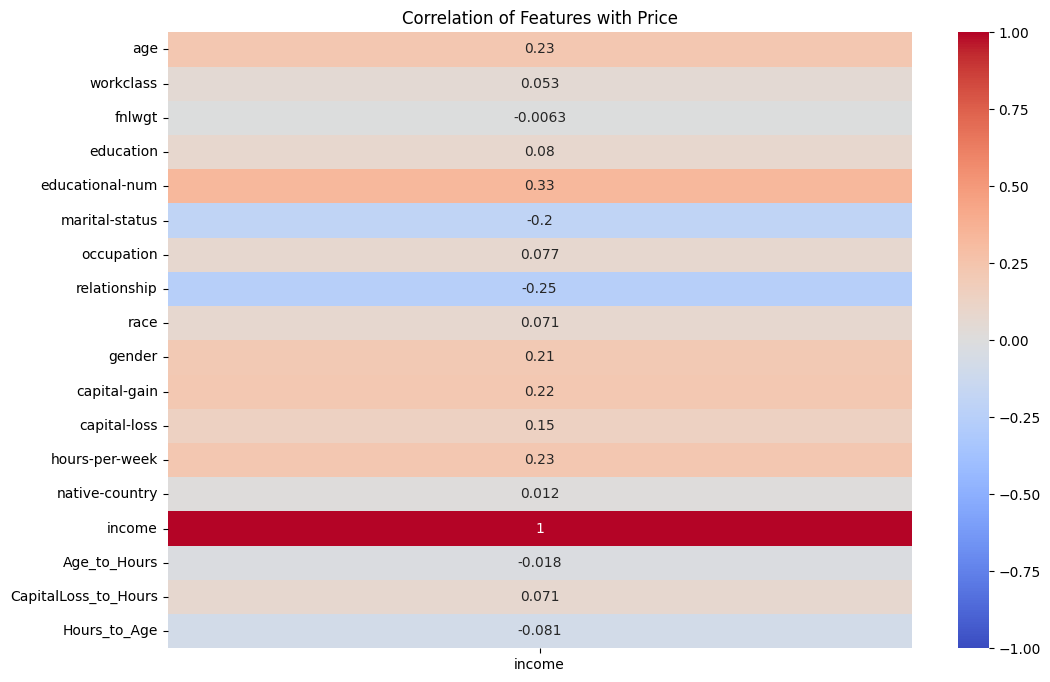

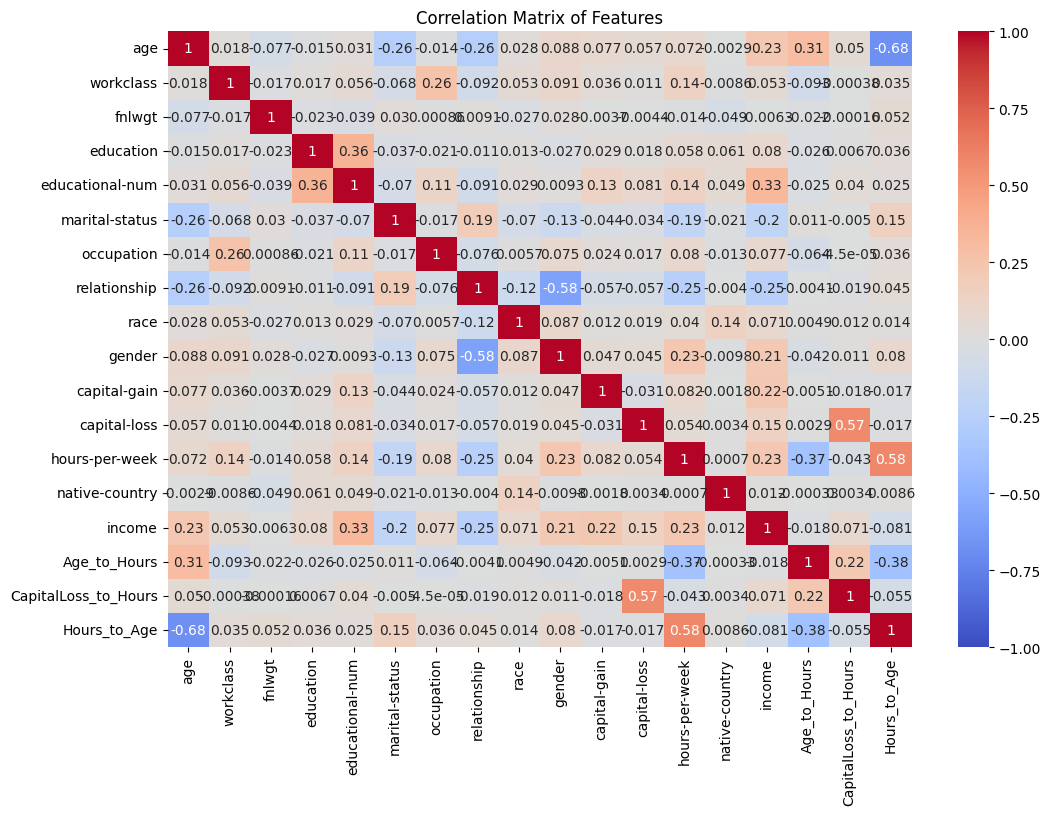

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns 
X = df.copy()
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['income']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Price")
plt.show()

# Check the correlation between all features to spot any potential multicollinearity
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(random_state=42)


rf_score = cross_val_score(rf_model, X, y, cv=5, scoring="accuracy")


rf_score_mean = rf_score.mean()


print(f"Accuracy Score with Random Forest: {rf_score_mean:.4f}")

Accuracy Score with Random Forest: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(random_state=42)


gb_score = cross_val_score(gb_model, X, y, cv=5, scoring="accuracy")


gb_score_mean = gb_score.mean()


print(f"Accuracy Score with Gradient Boosting: {gb_score_mean:.4f}")


Accuracy Score with Gradient Boosting: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0),
}


for model_name, model in models.items():
    score = cross_val_score(model, X, y, cv=5, scoring="accuracy")  # Use accuracy for classification
    mean_score = score.mean()
    print(f"{model_name} Accuracy Score: {mean_score:.4f}")


Decision Tree Accuracy Score: 1.0000
Random Forest Accuracy Score: 1.0000
Gradient Boosting Accuracy Score: 1.0000
